<a href="https://colab.research.google.com/github/Hamza-Atiq/Innoquest-choret1-AI-ML-Training-/blob/main/Lecture6_innovista_training_program_applying_model_and_analyzing_outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Case Study**

In [2]:
raw_csv_data = pd.read_csv('/content/Absenteeism_data.csv')
raw_csv_data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


# Preprocessing

In [3]:
df = raw_csv_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
df

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
5,3,23,10/07/2015,179,51,38,239.554,31,1,0,0,2
6,10,22,17/07/2015,361,52,28,239.554,27,1,1,4,8
7,20,23,24/07/2015,260,50,36,239.554,23,1,4,0,4
8,14,19,06/07/2015,155,12,34,239.554,25,1,2,0,40
9,1,22,13/07/2015,235,11,37,239.554,29,3,1,1,8


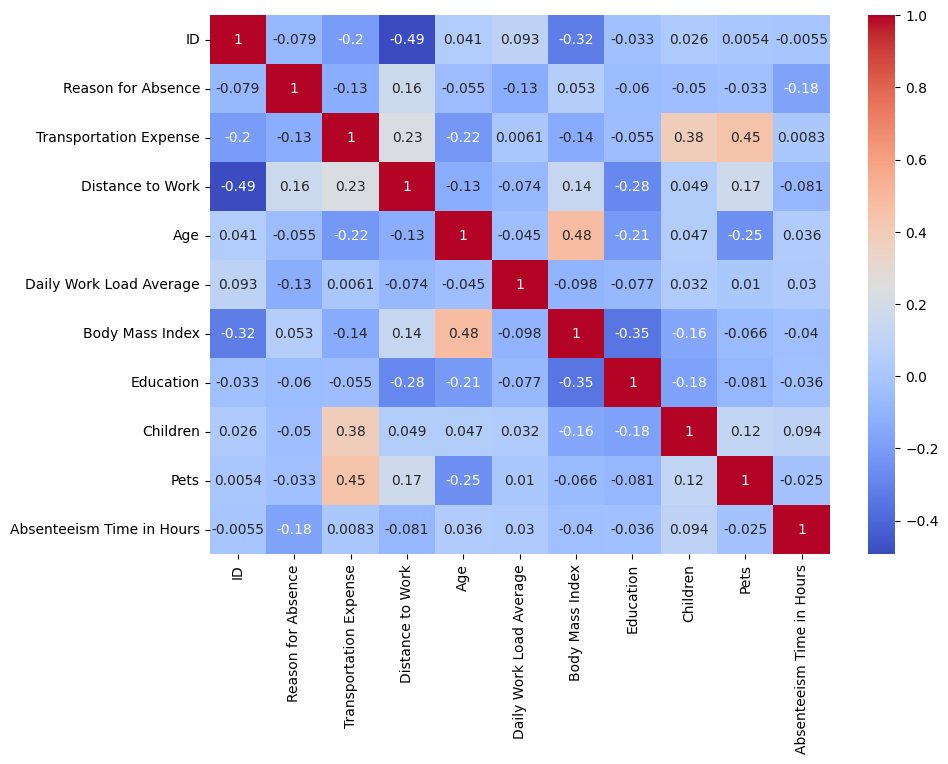

In [6]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only = True) , annot=True, cmap='coolwarm')
plt.show()

In [7]:
df.drop(['ID'], axis=1, inplace=True)

In [8]:
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [9]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [10]:
df['Reason for Absence'].min()

0

In [11]:
df['Reason for Absence'].max()

28

In [12]:
len(df['Reason for Absence'].unique())

28

In [13]:
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [14]:
df = pd.get_dummies(df, columns=['Reason for Absence'] , dtype = int)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason for Absence_0,Reason for Absence_1,Reason for Absence_2,Reason for Absence_3,Reason for Absence_4,Reason for Absence_5,Reason for Absence_6,Reason for Absence_7,Reason for Absence_8,Reason for Absence_9,Reason for Absence_10,Reason for Absence_11,Reason for Absence_12,Reason for Absence_13,Reason for Absence_14,Reason for Absence_15,Reason for Absence_16,Reason for Absence_17,Reason for Absence_18,Reason for Absence_19,Reason for Absence_21,Reason for Absence_22,Reason for Absence_23,Reason for Absence_24,Reason for Absence_25,Reason for Absence_26,Reason for Absence_27,Reason for Absence_28
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [15]:
df.shape

(700, 38)

In [16]:
df.sum()

,0
Date,07/07/201514/07/201515/07/201516/07/201523/07/...
Transportation Expense,155643
Distance to Work,20925
Age,25492
Daily Work Load Average,190261.242
Body Mass Index,18716
Education,898
Children,715
Pets,481
Absenteeism Time in Hours,4733


# Reason 1 to 14   class 1
# Reason 15 to 17  class 2
# Reason 18 to 21  class 3
# Reason 22 to 28  class 4

In [17]:
df.drop(['Reason for Absence_0'], axis=1, inplace=True)

In [18]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason for Absence_1,Reason for Absence_2,Reason for Absence_3,Reason for Absence_4,Reason for Absence_5,Reason for Absence_6,Reason for Absence_7,Reason for Absence_8,Reason for Absence_9,Reason for Absence_10,Reason for Absence_11,Reason for Absence_12,Reason for Absence_13,Reason for Absence_14,Reason for Absence_15,Reason for Absence_16,Reason for Absence_17,Reason for Absence_18,Reason for Absence_19,Reason for Absence_21,Reason for Absence_22,Reason for Absence_23,Reason for Absence_24,Reason for Absence_25,Reason for Absence_26,Reason for Absence_27,Reason for Absence_28
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [19]:
df['reason_type_1'] = df.loc[: , 'Reason for Absence_1' : 'Reason for Absence_14'].max(axis=1)
df['reason_type_2'] = df.loc[: , 'Reason for Absence_15' : 'Reason for Absence_17'].max(axis=1)
df['reason_type_3'] = df.loc[: , 'Reason for Absence_18' : 'Reason for Absence_21'].max(axis=1)
df['reason_type_4'] = df.loc[: , 'Reason for Absence_22' : 'Reason for Absence_28'].max(axis=1)
df.drop(columns=df.loc[: , 'Reason for Absence_1' : 'Reason for Absence_28'], axis=1, inplace=True)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_type_1,reason_type_2,reason_type_3,reason_type_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


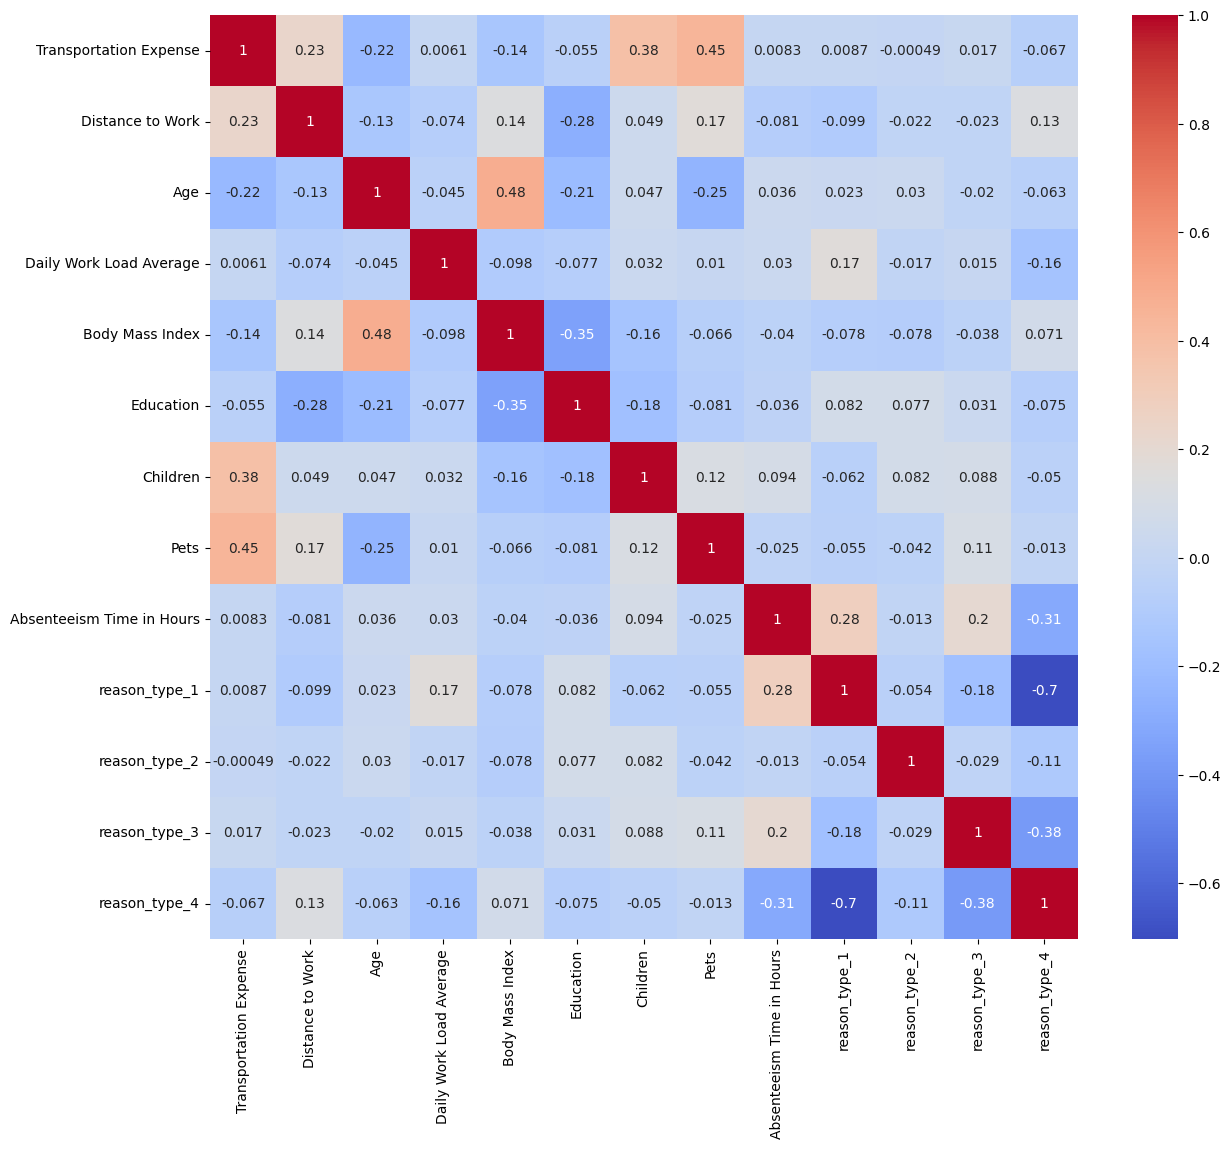

In [20]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(numeric_only = True) , annot=True, cmap='coolwarm')
plt.show()

In [21]:
df_reason_mod = df.copy()
df_reason_mod.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_type_1,reason_type_2,reason_type_3,reason_type_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [22]:
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format='%d/%m/%Y')
df_reason_mod.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_type_1,reason_type_2,reason_type_3,reason_type_4
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [23]:
df_reason_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       700 non-null    datetime64[ns]
 1   Transportation Expense     700 non-null    int64         
 2   Distance to Work           700 non-null    int64         
 3   Age                        700 non-null    int64         
 4   Daily Work Load Average    700 non-null    float64       
 5   Body Mass Index            700 non-null    int64         
 6   Education                  700 non-null    int64         
 7   Children                   700 non-null    int64         
 8   Pets                       700 non-null    int64         
 9   Absenteeism Time in Hours  700 non-null    int64         
 10  reason_type_1              700 non-null    int64         
 11  reason_type_2              700 non-null    int64         
 12  reason_t

In [24]:
df_reason_mod['Month'] = df_reason_mod['Date'].dt.month
df_reason_mod['Day of the Week'] = df_reason_mod['Date'].dt.dayofweek
df_reason_mod.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_type_1,reason_type_2,reason_type_3,reason_type_4,Month,Day of the Week
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0,7,1
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1,7,2
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0,7,3
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1,7,3


In [25]:
df_reason_mod.columns

Index(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours', 'reason_type_1', 'reason_type_2',
       'reason_type_3', 'reason_type_4', 'Month', 'Day of the Week'],
      dtype='object')

In [26]:
df_reason_mod = df_reason_mod[['reason_type_1', 'reason_type_2','reason_type_3', 'reason_type_4', 'Month', 'Day of the Week',
               'Date', 'Transportation Expense', 'Distance to Work', 'Age','Daily Work Load Average',
               'Body Mass Index', 'Education', 'Children','Pets', 'Absenteeism Time in Hours']]

In [27]:
pd.options.display.max_columns = 15


In [28]:
df_reason_mod.head()

,reason_type_1,reason_type_2,reason_type_3,reason_type_4,Month,Day of the Week,Date,...,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,2015-07-07,...,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,2015-07-14,...,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,2015-07-15,...,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,2015-07-16,...,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,2015-07-23,...,33,239.554,30,1,2,1,2


In [29]:
df_reason_mod['Transportation Expense'].unique()

array([289, 118, 179, 279, 361, 260, 155, 235, 246, 189, 248, 330, 157,
       291, 184, 225, 369, 388, 378, 228, 300, 268, 231, 233])

In [30]:
df_reason_mod['Distance to Work'].unique()

array([36, 13, 51,  5, 52, 50, 12, 11, 25, 29, 16, 27, 42, 10, 20, 31, 26,
       17, 22, 15, 49, 48, 14, 35])

In [31]:
df_reason_mod['Age'].unique()

array([33, 50, 38, 39, 28, 36, 34, 37, 41, 47, 29, 48, 32, 27, 43, 40, 31,
       30, 49, 58, 46])

In [32]:
df_reason_mod['Daily Work Load Average'].unique()

array([239.554, 205.917, 241.476, 253.465, 306.345, 261.306, 308.593,
       302.585, 343.253, 326.452, 378.884, 377.55 , 275.312, 265.615,
       294.217, 265.017, 284.031, 236.629, 330.061, 251.818, 244.387,
       239.409, 246.074, 253.957, 230.29 , 249.797, 261.756, 284.853,
       268.519, 280.549, 313.532, 264.249, 222.196, 246.288, 237.656])

In [33]:
df_reason_mod['Body Mass Index'].unique()

array([30, 31, 24, 27, 23, 25, 29, 32, 22, 33, 21, 28, 38, 19, 36, 35])

In [34]:
df_reason_mod['Education'].unique()

array([1, 3, 2, 4])

In [35]:
df_reason_mod['Education'].value_counts()

,count
Education,
1,583
3,73
2,40
4,4


In [36]:
df_reason_mod['Education'] = df_reason_mod['Education'].map({1:0, 2:1, 3:1, 4:1})

In [37]:
df_reason_mod['Education'].value_counts()

,count
Education,
0,583
1,117


In [38]:
del df_reason_mod['Date']

In [39]:
df_reason_mod.head()

,reason_type_1,reason_type_2,reason_type_3,reason_type_4,Month,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [40]:
df_reason_mod.to_csv('df_preprocessed.csv', index=False)

# **ML Models**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [42]:
preprocessed_data = pd.read_csv('/content/df_preprocessed.csv')
preprocessed_data.head()

,reason_type_1,reason_type_2,reason_type_3,reason_type_4,Month,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [43]:
preprocessed_data = preprocessed_data.iloc[: , 1:]
preprocessed_data.head()

,reason_type_2,reason_type_3,reason_type_4,Month,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [44]:
preprocessed_data['Absenteeism Time in Hours'].mean()

6.761428571428572

In [45]:
preprocessed_data['Excessive Absenteeism'] = np.where(preprocessed_data['Absenteeism Time in Hours'] > preprocessed_data['Absenteeism Time in Hours'].mean() , 1 , 0)

In [46]:
preprocessed_data.head()

,reason_type_2,reason_type_3,reason_type_4,Month,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,0
1,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,0
4,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [47]:
del preprocessed_data['Absenteeism Time in Hours']

In [48]:
X = preprocessed_data.iloc[: , :-1]
y = preprocessed_data.iloc[: , -1]

In [49]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [50]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((560, 13), (140, 13), (560,), (140,))

In [51]:
reg = LogisticRegression()
reg.fit(X_train , y_train)

LogisticRegression()

In [52]:
reg.score(X_train , y_train)

0.7375

In [53]:
reg.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0])

In [54]:
scaled_data = StandardScaler()
scaled_data.fit(X)
standardized_data = scaled_data.transform(X)

In [55]:
standardized_data

array([[-0.09298136, -0.31448545,  0.82136542, ..., -0.44798003,
         0.88046927,  0.26848661],
       [-0.09298136, -0.31448545, -1.21748491, ..., -0.44798003,
        -0.01928035, -0.58968976],
       [-0.09298136, -0.31448545,  0.82136542, ..., -0.44798003,
        -0.91902997, -0.58968976],
       ...,
       [-0.09298136, -0.31448545, -1.21748491, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.09298136, -0.31448545,  0.82136542, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.09298136, -0.31448545,  0.82136542, ..., -0.44798003,
        -0.01928035,  0.26848661]])

In [56]:
X_train , X_test , y_train , y_test = train_test_split(standardized_data , y.values , test_size=0.2 , random_state=42)

In [57]:
reg.fit(X_train , y_train)

LogisticRegression()

In [58]:
reg.score(X_train , y_train)

0.7357142857142858

In [59]:
reg.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0])

In [60]:
reg.score(X_test , y_test)

0.7428571428571429

In [61]:
reg.intercept_

array([-0.63692616])

In [62]:
reg.coef_

array([[ 0.03636388,  0.3934261 , -0.84161127, -0.0435508 , -0.21285094,
         0.64739142, -0.09709257, -0.24015909,  0.07775511,  0.31957681,
        -0.06105699,  0.13581147, -0.20873632]])

In [63]:
reg_analysis = pd.DataFrame(reg.coef_.T , index=X.columns , columns=['Coefficient'])
reg_analysis

,Coefficient
reason_type_2,0.036364
reason_type_3,0.393426
reason_type_4,-0.841611
Month,-0.043551
Day of the Week,-0.212851
Transportation Expense,0.647391
Distance to Work,-0.097093
Age,-0.240159
Daily Work Load Average,0.077755
Body Mass Index,0.319577


In [64]:
reg_analysis.sort_values('Coefficient' , ascending=False)

,Coefficient
Transportation Expense,0.647391
reason_type_3,0.393426
Body Mass Index,0.319577
Children,0.135811
Daily Work Load Average,0.077755
reason_type_2,0.036364
Month,-0.043551
Education,-0.061057
Distance to Work,-0.097093
Pets,-0.208736
